<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/HW/2022/01NAEX_HW02_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX - Homework 2: Matrix multiplication problem
TEAM:
* Frátrik Emanuel
* Kysilka Lukáš
* Nguyenová Thi Thu Hien
* Ruženikov Jurij
* Stojaspal Pavel



In [ ]:
cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y DoE.base', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse","MASS", "lattice", "FrF2") # "agricolae","nortest","lattice","pwr",
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Warning message in system("sudo apt-get install -y gmp", intern = TRUE):
“running command 'sudo apt-get install -y gmp' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...


Warning message in system("sudo apt-get install -y partitions", intern = TRUE):
“running command 'sudo apt-get install -y partitions' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
r-cran-doe.base is already the newest version (1.2-1-1cran1.1804.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


character(0)

[[1]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[2]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[3]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[4]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"

In [ ]:
tibble::tibble(
  Package = names(installed.packages()[,3]),
  Version = unname(installed.packages()[,3])
)

Package,Version
<chr>,<chr>
FrF2,2.2-3
igraph,1.3.5
IRdisplay,1.1
IRkernel,1.3.1
pbdZMQ,0.3-8
repr,1.1.4
scatterplot3d,0.3-42
sfsmisc,1.1-14
askpass,1.1


# 0. Decide how you will determine the low and high levels for each variable. What data will you record. 

* Temperature: 20 or 30
* Implementation: 0 = custon multiplication, 1 = with library numpy
* Dtype: 0 = int, 1 = float
* Internet: 0 = internet on, 1 = internet off
* Performance is performance of RAM in GB: 3.5 or 5.6
* Range: 10 or 10 000
* Size: 50 or 150
* Sparsity: 20% or 80%	

# 1. What are the generators used in the design and why did you choose them? $2^{8-2}$ design.

  If we label the factors as follows:

*   implementation - A
*   sparsity - B
*   range	- C
*   dtype	- D
*   size - E	
*   ram - F	
*   internet	- G
*   temperature - H 

The chosen generators are: 
 - G = ABCD, H = ABEF

Therefore defining relation is:

 - I = ABCDG = ABEFH = CDEFGH.

The choice was made under assumpiton that the factors G and H will not have any effect on time.


A(ABCD) = BCD = BEG = ACDEG
B(ABCD) = ACD = AEG = BCDEG
C(ABCD) = 
  
Resolution is of type V.

If you have multiple operators, is the effect of this nuisance factor in the representation with any effect of interest?
  
We do not use blocking.

What is the alternative division (alternative generators)?

Alternative generators are G = -ABCD, H = -ABEF.

In [1]:
#data <- read.csv("data.csv")
data <- read.table("https://raw.githubusercontent.com/francji1/01NAEX/main/HW/2022/NAEX_2022_HW02_data.csv",header=TRUE,sep=";")
data


X.temperature.performance.internet.size.set.range.sparsity.multiply.time
<chr>
"1,20,3.5,0,50,0,10,0.2,0,0.104223966598511"
"2,20,3.5,0,50,0,10,0.2,1,0.000153303146362"
"3,20,3.5,0,50,0,10,0.8,0,0.104201555252075"
"4,20,3.5,0,50,0,10,0.8,1,0.000153064727783"
"5,20,3.5,0,50,0,100000,0.2,0,0.10609769821167"
"6,20,3.5,0,50,0,100000,0.2,1,0.000159502029419"
"7,20,3.5,0,50,0,100000,0.8,0,0.103506088256836"
"8,20,3.5,0,50,0,100000,0.8,1,0.00016713142395"
"9,20,3.5,0,50,1,10,0.2,0,0.092651605606079"


In [ ]:
data <- data %>% rename(dtype = set,
                       implementation = multiply,
                       ram = performance) %>%
        mutate(dtype = recode(dtype, '0' = "int",
         '1' = "float",
         ),
         implementation = recode(implementation, '0' = "custom",
         '1' = "numpy",
         )
     ) %>% mutate(implementation = as.factor(implementation), 
                  dtype = as.factor(dtype), 
                  ram = as.factor(ram),
                  size = as.factor(size),
                  range = as.factor(range),
                  sparsity = as.factor(sparsity),
                  temperature = as.factor(temperature),
                  internet = as.factor(internet),
                  time=time)
# Added relocation of temperature and internet to the end of df. 
# This might not seem important, but will result in correct factorial design further.


# mapping for backward compability
data_mapping <- data %>% 
        mutate(dtype = recode(dtype, 'int' = '-1', 'float' = '1'),
               implementation = recode(implementation, 'custom' = '-1', 'numpy' = '1'),
               ram = recode(ram, '3.5' = '-1', '5.6' = '1'),
               size = recode(size, '50' = '-1', '150' = '1'),
               range = recode(range, '10' = '-1', '100000' = '1'),
               sparsity = recode(sparsity, '0.2' = '-1', '0.8' = '1'),
               temperature = recode(temperature, '20' = '-1', '30' = '1'),
               internet = recode(internet, '1' = '-1','0' = '1')
               )
               
#data <- subset(data, select = -c(1)) %>% 
#    relocate(temperature,internet, .after = implementation)

head(data,5)
head(data_mapping, 5)

,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,20,3.5,0,50,int,10,0.2,custom,0.1042239666
2,2,20,3.5,0,50,int,10,0.2,numpy,0.0001533031
3,3,20,3.5,0,50,int,10,0.8,custom,0.1042015553
4,4,20,3.5,0,50,int,10,0.8,numpy,0.0001530647
5,5,20,3.5,0,50,int,100000,0.2,custom,0.1060976982


,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,-1,-1,1,-1,-1,-1,-1,-1,0.1042239666
2,2,-1,-1,1,-1,-1,-1,-1,1,0.0001533031
3,3,-1,-1,1,-1,-1,-1,1,-1,0.1042015553
4,4,-1,-1,1,-1,-1,-1,1,1,0.0001530647
5,5,-1,-1,1,-1,-1,1,-1,-1,0.1060976982


In [ ]:

# Creating 1/4 factorial design
design =FrF2(2^(8-2), 8, replications = 1, randomize = FALSE,
generators=c("ABCD","ABEF"), 
factor.names = c("implementation", "sparsity", "range",
                 "dtype", "size", "ram","internet", "temperature")
                 )

# Extracting time from original data using `data_mapping`
correct_data = data_mapping[data_mapping$temperature == design$temperature & 
                            data_mapping$internet == design$internet, ]


# Adding response to the design
time = correct_data$time
design = add.response(design, time)

# BUT RESPONSE IS STILL WRONGLY MAPPED
design$implementation = correct_data$implementation
design$sparsity= correct_data$sparsity
design$range = correct_data$range
design$dtype = correct_data$dtype
design$size = correct_data$size
design$ram = correct_data$ram
design$internet = correct_data$internet
design$temperature = correct_data$temperature

# NOW ORDER OF EXPERIMENTS IS NOT CORRECT BUT FEATURES ARE CORRECTLY MAPPED
#  TO RESPONSE

summary(design)
design


Call:
FrF2(2^(8 - 2), 8, replications = 1, randomize = FALSE, generators = c("ABCD", 
    "ABEF"), factor.names = c("implementation", "sparsity", "range", 
    "dtype", "size", "ram", "internet", "temperature"))

Experimental design of type  FrF2.generators 
64  runs

Factor settings (scale ends):
  implementation sparsity range dtype size ram internet temperature
1             -1       -1    -1    -1   -1  -1       -1          -1
2              1        1     1     1    1   1        1           1

Responses:
[1] time

Design generating information:
$legend
[1] A=implementation B=sparsity       C=range          D=dtype         
[5] E=size           F=ram            G=internet       H=temperature   

$generators
[1] G=ABCD H=ABEF


Alias structure:
[[1]]
[1] no aliasing among main effects and 2fis



,implementation,sparsity,range,dtype,size,ram,internet,temperature,time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,-1,1,-1,-1,-1,1,-1,1.595020e-04
2,-1,1,1,-1,-1,-1,1,-1,1.035061e-01
3,1,-1,-1,1,-1,-1,1,-1,1.978874e-05
4,-1,1,-1,1,-1,-1,1,-1,9.313273e-02
5,-1,-1,-1,-1,1,-1,1,-1,2.849526e+00
6,1,1,-1,-1,1,-1,1,-1,3.945589e-03
7,-1,-1,1,1,1,-1,1,-1,2.100054e+00
8,1,1,1,1,1,-1,1,-1,1.938343e-04
9,-1,-1,1,-1,-1,-1,-1,-1,8.871007e-02


In [ ]:
correct_data

,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
6,6,-1,-1,1,-1,-1,1,-1,1,1.595020e-04
7,7,-1,-1,1,-1,-1,1,1,-1,1.035061e-01
10,10,-1,-1,1,-1,1,-1,-1,1,1.978874e-05
11,11,-1,-1,1,-1,1,-1,1,-1,9.313273e-02
17,17,-1,-1,1,1,-1,-1,-1,-1,2.849526e+00
20,20,-1,-1,1,1,-1,-1,1,1,3.945589e-03
29,29,-1,-1,1,1,1,1,-1,-1,2.100054e+00
32,32,-1,-1,1,1,1,1,1,1,1.938343e-04
37,37,-1,-1,-1,-1,-1,1,-1,-1,8.871007e-02


# 2. Count the individual effects.

In [ ]:
lm_for_coeffs <- lm(time~temperature*ram*internet*size*dtype*range*sparsity*implementation,
                  data=correct_data)
effects <-as.data.frame(2*lm_for_coeffs$coefficients)
names(effects)[1] <- 'Effects'
effects

,Effects
,<dbl>
(Intercept),0.20804414
temperature1,0.18033966
ram1,1.16968745
internet-1,-0.04948482
size1,4.19511399
dtype-1,0.22286910
range1,-0.20305103
sparsity1,-0.02177867
implementation1,-0.20800456


# 3. Find out what factors and their interactions appear significant (use daniel and pareto plot)
    Create main effects plot, interaction plot, boxplots.
    TODO: What can be inferred from the data? Comment carefully. If you know another useful visualization of the measured values, do it.

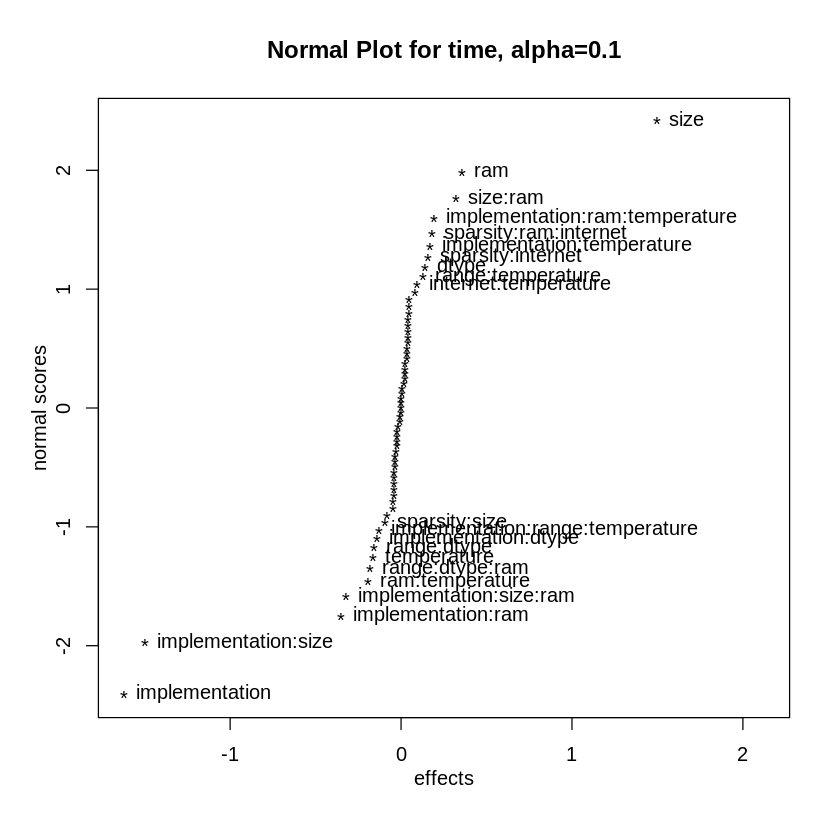

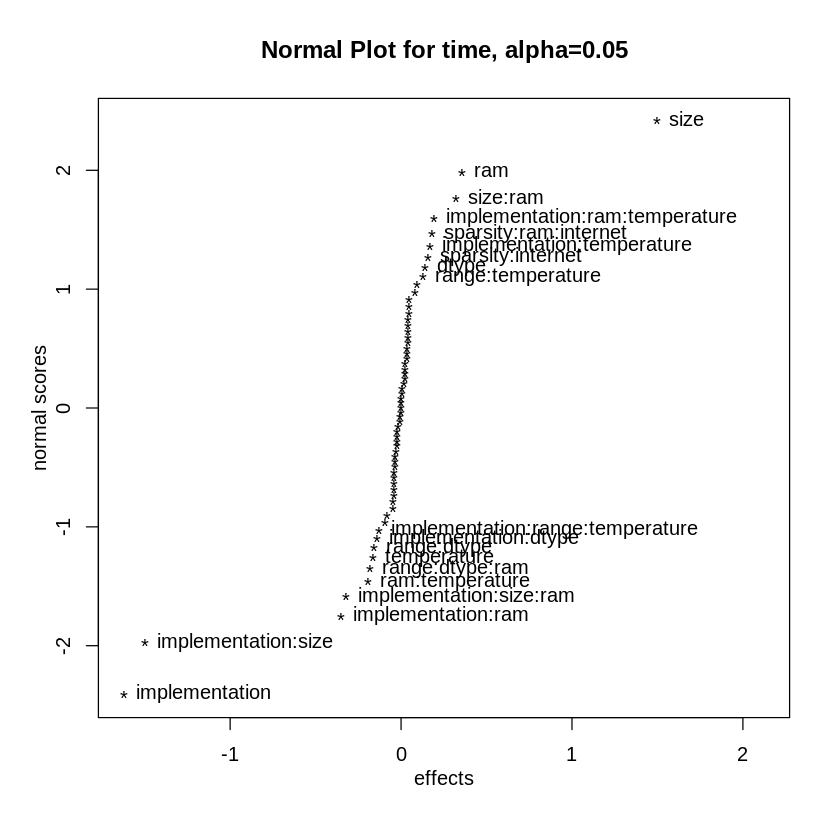

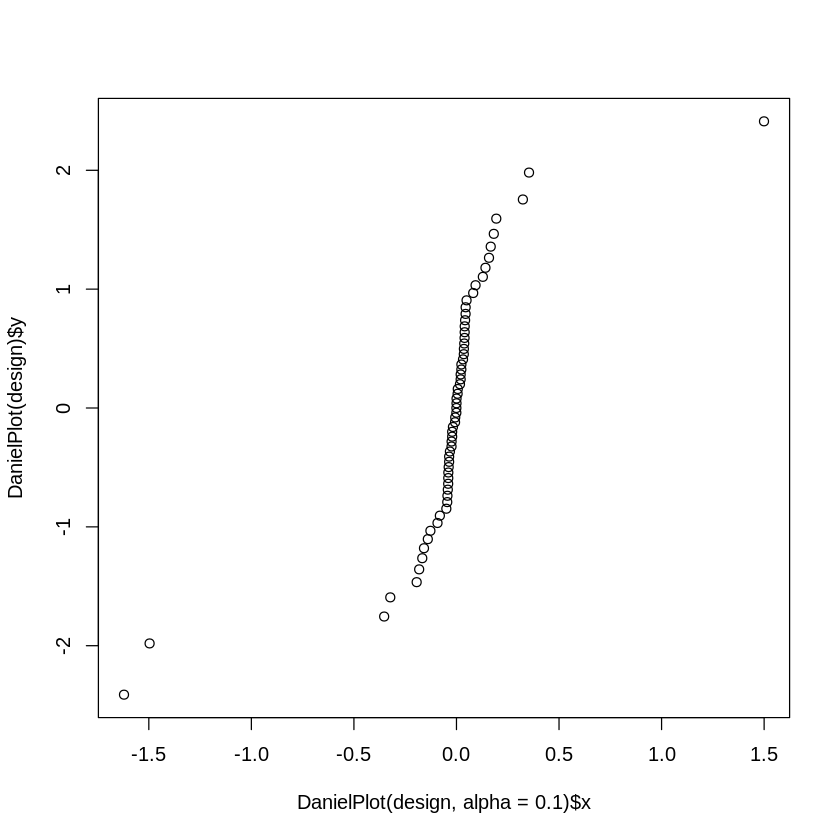

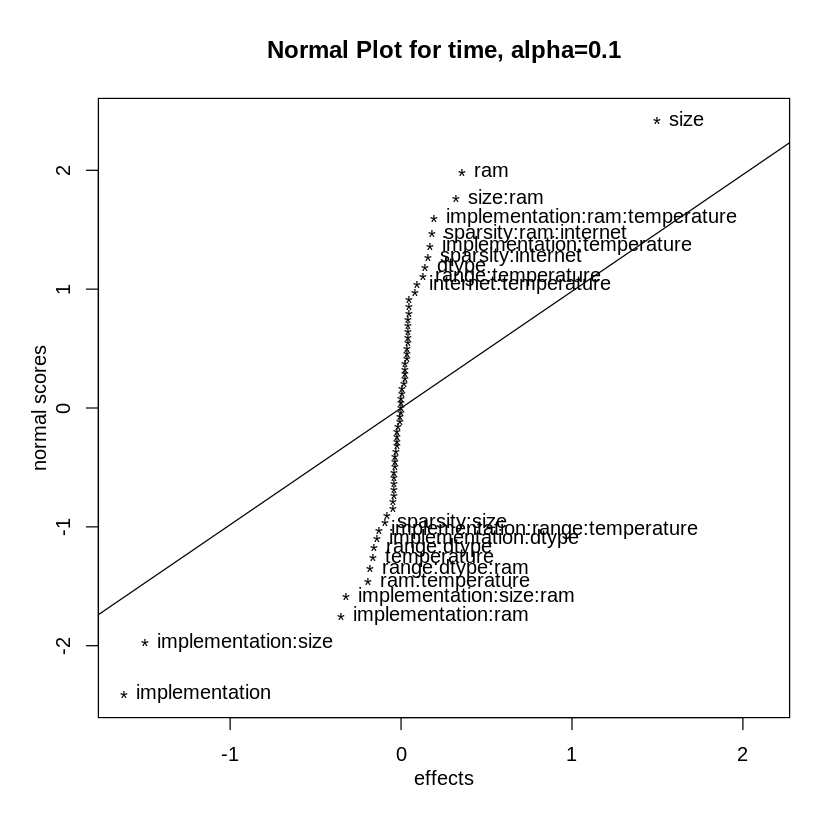

In [ ]:
# Daniel plot
qqplot(DanielPlot(design,alpha=0.1)$x,DanielPlot(design)$y)
qqline(DanielPlot(design,alpha=0.1)$y)

Factors with significant influence on resulting time should deviate from normal plot line. Therefore according to this plot we can expect factors implementation, size, ram and intercations between implementation and size and size and ram to have most significant effect on resulting time but prior to draw any conclusions we need to perform anova analysis.

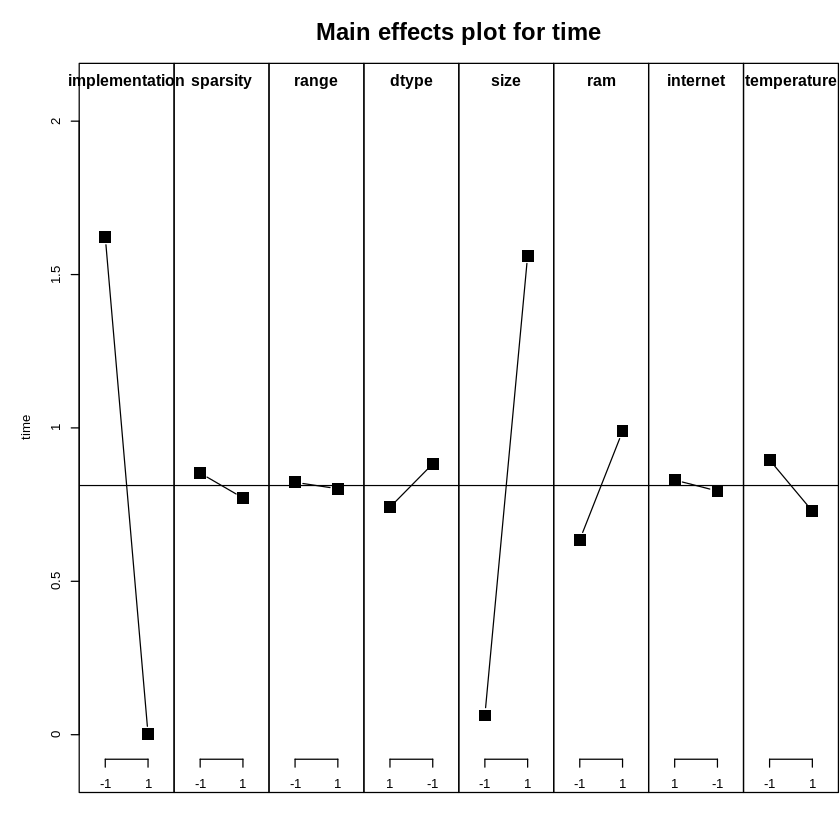

In [ ]:
# main effects plot
MEPlot(design)

Main effect plot suggests that implementation and size have highest effect on resulting time. It seems that ram and temperature can be influential as well.

In [ ]:
# design %>% 
#   group_by(range) %>% 
#   summarise(mean_time = mean(time))
# data %>% 
#   group_by(internet) %>% 
#   summarise(mean_time = mean(time))

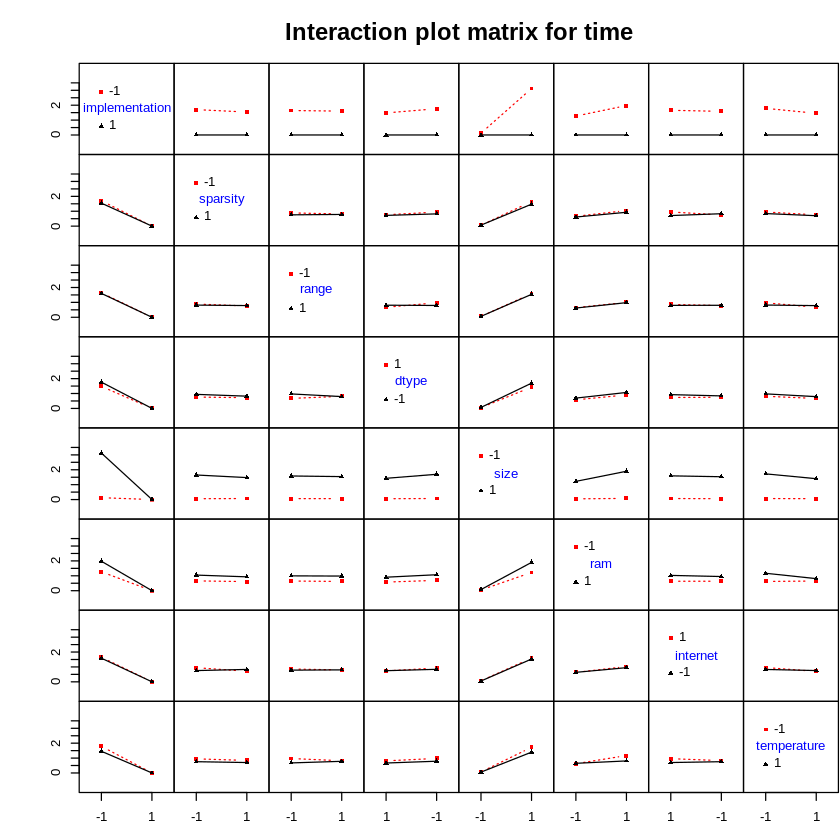

In [ ]:
# interaction plot
IAPlot(design)

According to interaction plot there could be intercation between size of matrix and implementation used. Significance of this 2nd order interaction will be evaluated using anova...

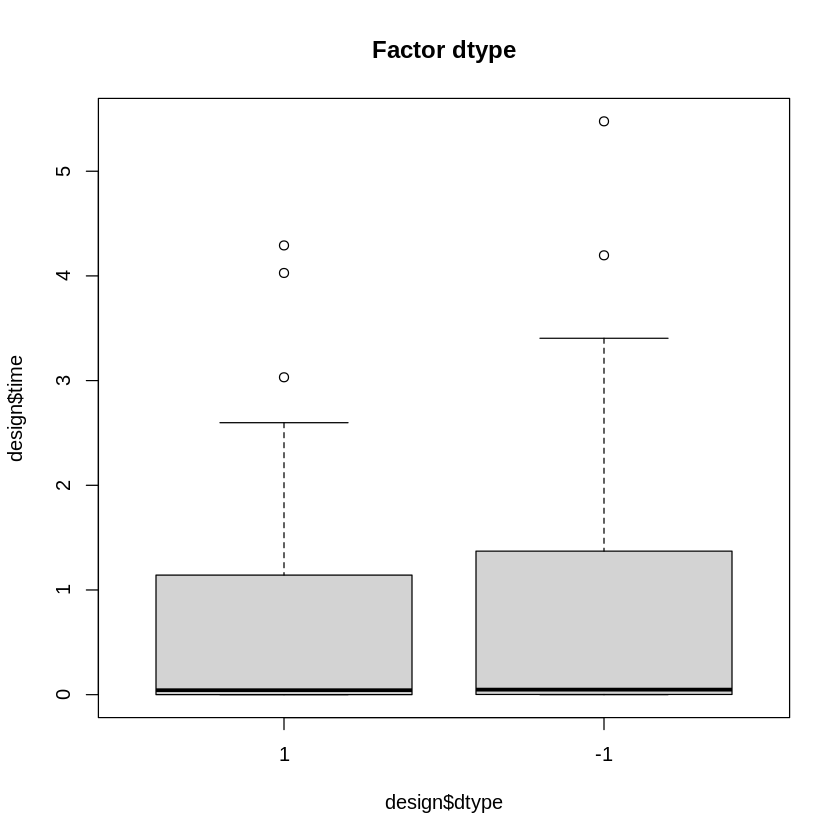

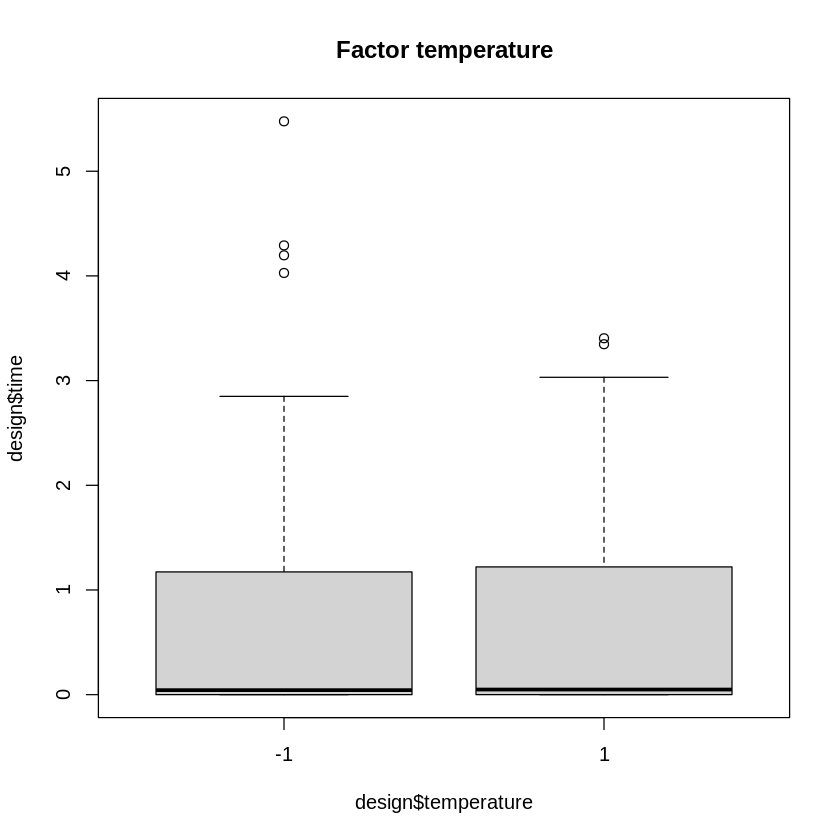

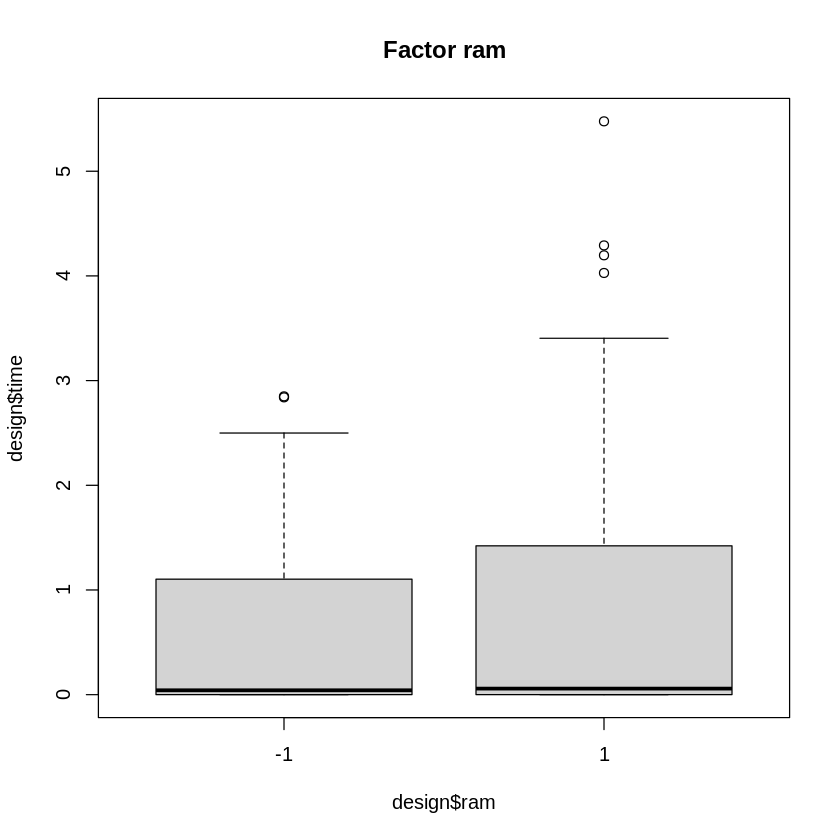

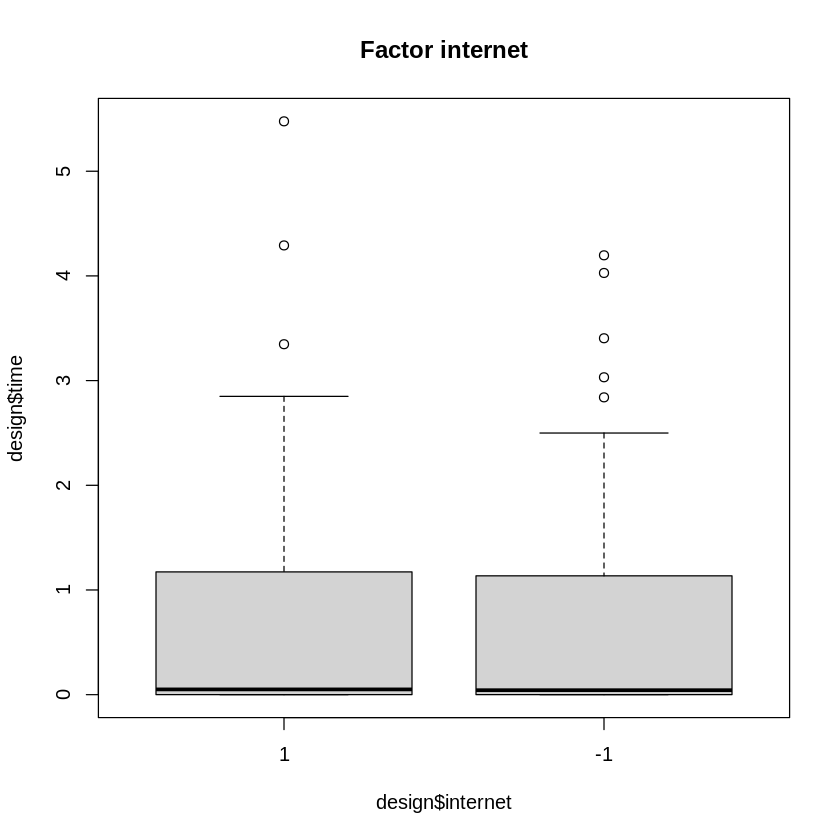

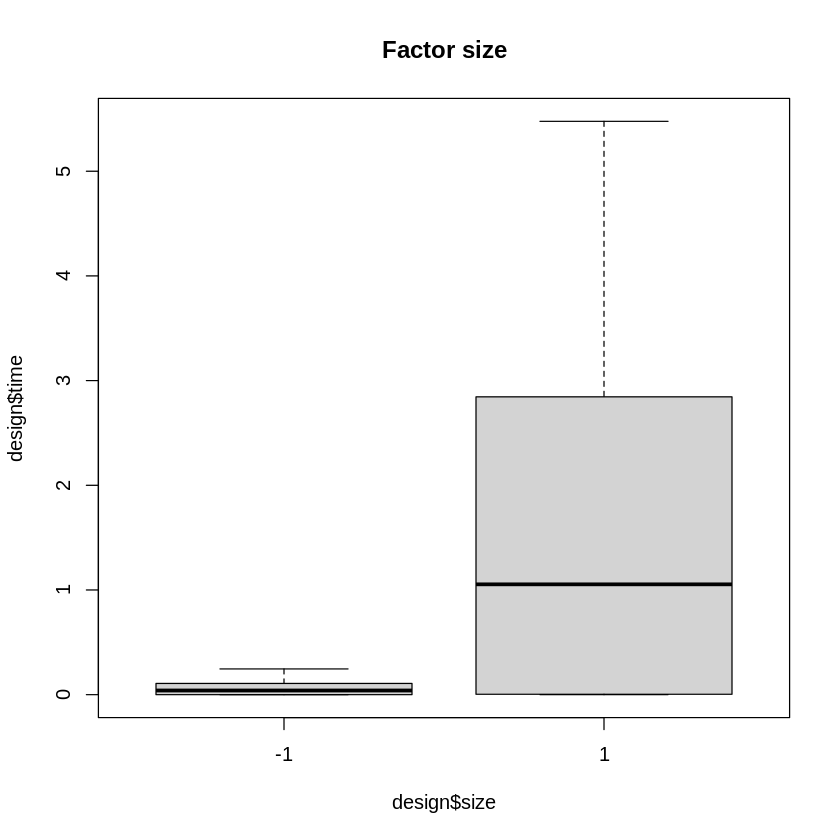

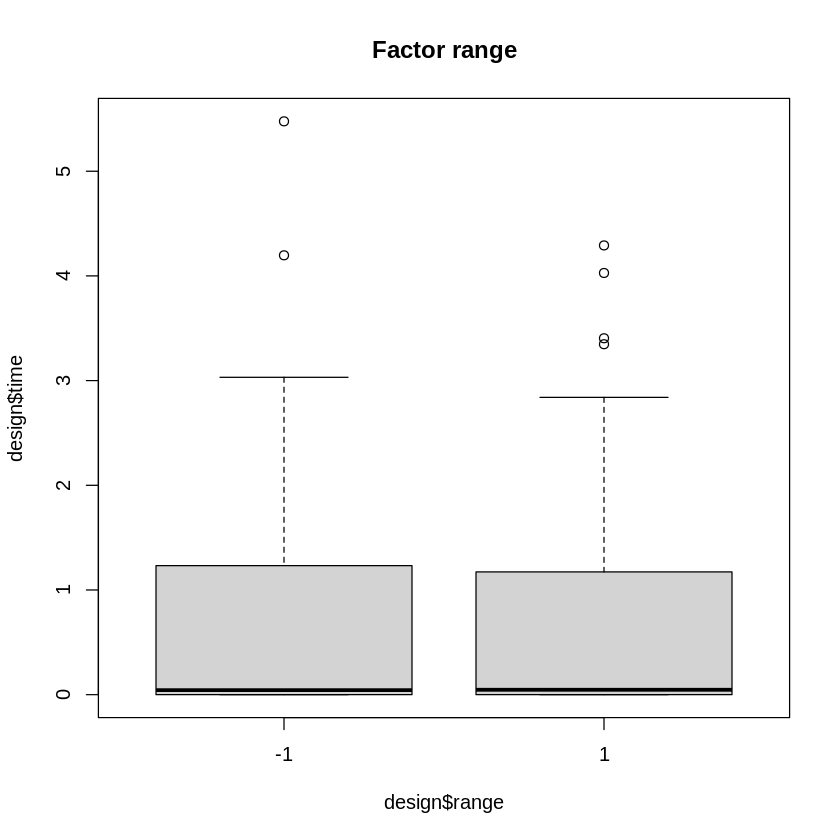

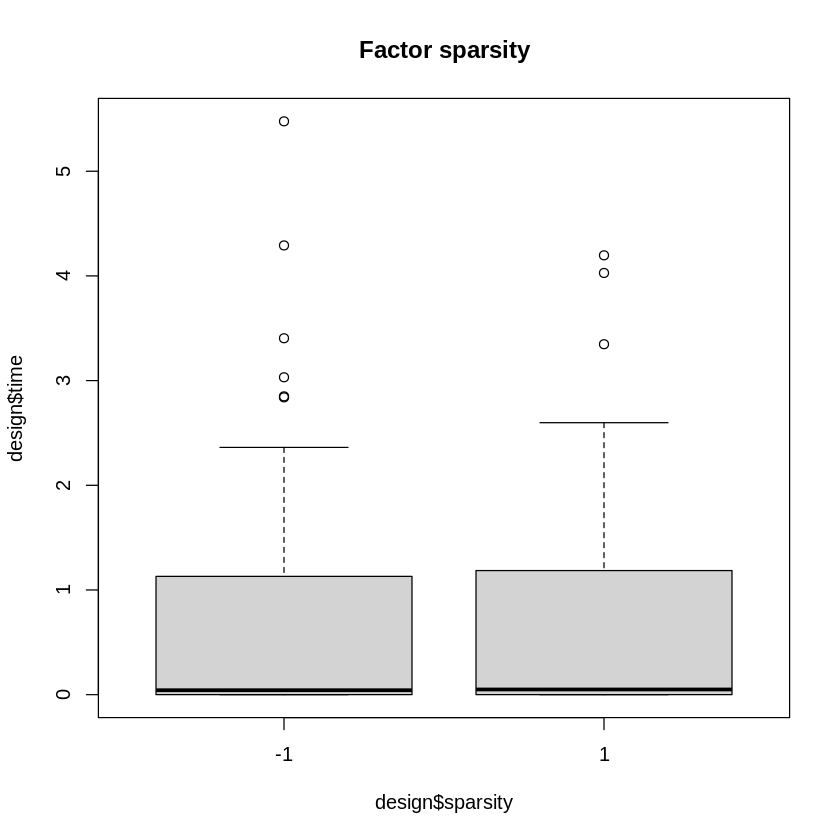

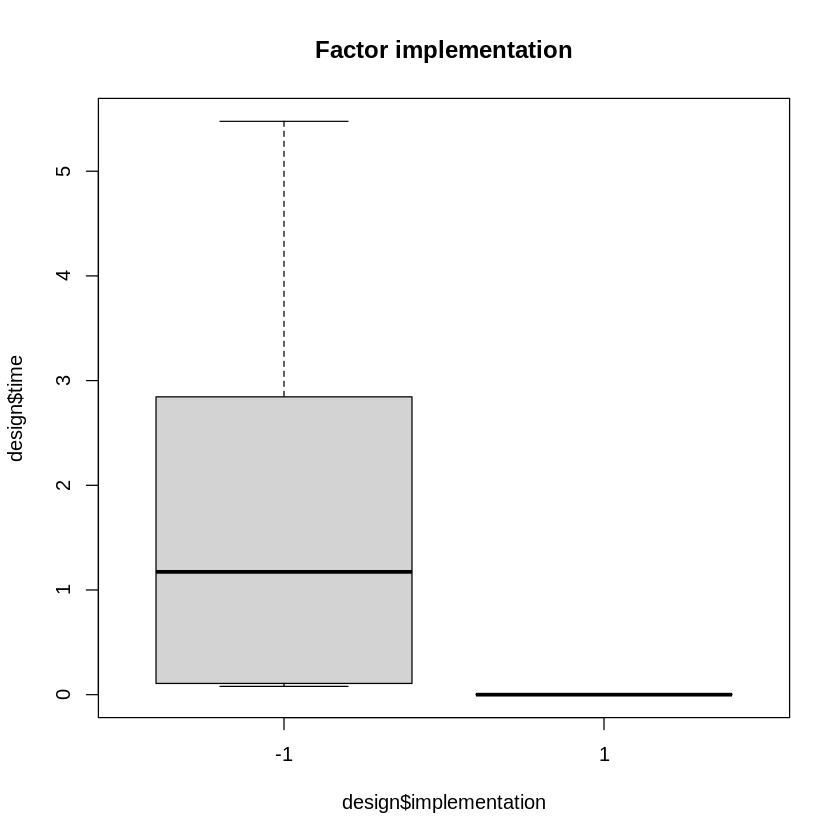

In [ ]:
# boxplot
boxplot(design$time ~ design$dtype, main = "Factor dtype")
boxplot(design$time ~ design$temperature, main = "Factor temperature")
boxplot(design$time ~ design$ram, main = "Factor ram")
boxplot(design$time ~ design$internet, main = "Factor internet")
boxplot(design$time ~ design$size, main = "Factor size")
boxplot(design$time ~ design$range, main = "Factor range")
boxplot(design$time ~ design$sparsity, main = "Factor sparsity")
boxplot(design$time ~ design$implementation, main = "Factor implementation")

# 4. Perform analysis of variance, find and validate the resulting model without center point.

In [ ]:
# Resolution V factorial design means that 3 way interactions are aliased
# with 2 way interactions, hence we can't estimate them. 
#Any higher interaction is then also aliased.
# Final model:
summary(aov(time~(implementation+dtype+size+ram)^2-dtype:ram, data=design))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
implementation        1  42.04   42.04 323.286  < 2e-16 ***
dtype                 1   0.32    0.32   2.458 0.122780    
size                  1  35.97   35.97 276.594  < 2e-16 ***
ram                   1   2.00    2.00  15.392 0.000249 ***
implementation:dtype  1   0.31    0.31   2.402 0.127034    
implementation:size   1  35.82   35.82 275.425  < 2e-16 ***
implementation:ram    1   1.99    1.99  15.294 0.000259 ***
dtype:size            1   0.26    0.26   2.034 0.159569    
size:ram              1   1.68    1.68  12.898 0.000711 ***
Residuals            54   7.02    0.13                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 5. Use additional assumptions and additional measurements at the centres,  and confirm or reject assumption of the linear dependence in the numerical variables.

In [ ]:
# converts center point from csv file to the appropriate dataframe
data_center <- read.csv("datadodatek.csv")
data_center <- data_center %>% rename(dtype = set,
                       implementation = multiply,
                       ram = performance) %>%
        mutate(dtype = recode(dtype, '0' = "int",
         '1' = "float",
         ),
         implementation = recode(implementation, '0' = "custom",
         '1' = "numpy",
         )
     ) %>% mutate(implementation = as.factor(implementation), 
                  dtype = as.factor(dtype), 
                  ram = as.factor(ram),
                  size = as.factor(size),
                  range = as.factor(range),
                  sparsity = as.factor(sparsity),
                  temperature = as.factor(temperature),
                  internet = as.factor(internet),
                  time=time)

data_center <- data_center %>% 
        mutate(dtype = recode(dtype, 'int' = '-1', 'float' = '1'),
               implementation = recode(implementation, 'custom' = '-1', 'numpy' = '1'),
               ram = recode(ram, '4.5' = '0'),
               size = recode(size, '100' = '0'),
               range = recode(range, '50000' = '0'),
               sparsity = recode(sparsity, '0.5' = '0'),
               temperature = recode(temperature, '25' = '0'),
               internet = recode(internet, '1' = '-1','0' = '1')
               )

In [ ]:
# adds center points to old dataframe
data_with_center = rbind(correct_data, data_center)
data_with_center

,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
6,6,-1,-1,1,-1,-1,1,-1,1,1.595020e-04
7,7,-1,-1,1,-1,-1,1,1,-1,1.035061e-01
10,10,-1,-1,1,-1,1,-1,-1,1,1.978874e-05
11,11,-1,-1,1,-1,1,-1,1,-1,9.313273e-02
17,17,-1,-1,1,1,-1,-1,-1,-1,2.849526e+00
20,20,-1,-1,1,1,-1,-1,1,1,3.945589e-03
29,29,-1,-1,1,1,1,1,-1,-1,2.100054e+00
32,32,-1,-1,1,1,1,1,1,1,1.938343e-04
37,37,-1,-1,-1,-1,-1,1,-1,-1,8.871007e-02


Make a model with center points

In [ ]:
isCenter = c(rep(0,times=64),rep(1,times=8))
data_with_center$isCenter = isCenter
summary(aov(time~ isCenter + implementation*dtype*size*ram, data=data_with_center))

                              Df Sum Sq Mean Sq F value   Pr(>F)    
isCenter                       1   0.31    0.31   3.227 0.078244 .  
implementation                 1  44.61   44.61 457.318  < 2e-16 ***
dtype                          1   0.31    0.31   3.201 0.079424 .  
size                           1  35.97   35.97 368.723  < 2e-16 ***
ram                            1   2.00    2.00  20.519 3.48e-05 ***
implementation:dtype           1   0.31    0.31   3.129 0.082772 .  
implementation:size            2  36.13   18.07 185.190  < 2e-16 ***
dtype:size                     2   0.28    0.14   1.424 0.249930    
implementation:ram             1   1.99    1.99  20.389 3.66e-05 ***
dtype:ram                      1   0.01    0.01   0.094 0.760436    
size:ram                       1   1.68    1.68  17.194 0.000125 ***
implementation:dtype:size      2   0.27    0.14   1.392 0.257712    
implementation:dtype:ram       1   0.01    0.01   0.096 0.758377    
implementation:size:ram        1  

In [ ]:
SS_pure_error = 5.07/52
SS_pure_quadratic = 0.31
MSE = SS_pure_error/52

# p value
p_value = pf(MSE/SS_pure_quadratic, 52, 1, lower.tail=TRUE)
p_value

[1] 8.903084e-18

# 6. Construct a regression model where you convert the coded quantitative variables to actual numerical values    (use the other variables according to their significance).

The variables were converted to numerical actual values (except variables implementation, internet and dtype)  .

In [ ]:
#  here I perform linear mapping {-1,0,1} -> {actual_low, center, actual_high}
# the equation is "y = x*(B-A)/2 + (A+B)/2
#     where "y" is actual value
#           "x" is factorial value, x is from set {-1,0,1}
#           "A" ("B") is the low (high) value of "y", i.e. actual value
data <- data_with_center %>% transmute(
                           implementation = as.factor(implementation),
                           sparsity = as.numeric(as.character(sparsity))*(0.8-0.2)/2 + (0.2+0.8)/2,
                           range = as.numeric(as.character(range))*(10000-10)/2 + (10+10000)/2,
                           dtype = as.factor(dtype),
                           size = as.numeric(as.character(size))*(150-50)/2 + (50+150)/2,
                           ram = as.numeric(as.character(ram))*(5.6-3.5)/2 + (3.5+5.6)/2,
                           internet = as.factor(internet),
                           temperature = as.numeric(as.character(temperature))*(30-20)/2 + (20+30)/2,
                           time = as.numeric(time)
                           )
# same centrer point are not exacely in the center
# I set back the original value
data$range[data$range == 5005] = 5000  # instead od 5005 there should be 5000
data$ram[data$ram == 4.55] = 4.5  # instead of 4.55 there should be 4.5

head(data)

,implementation,sparsity,range,dtype,size,ram,internet,temperature,time
,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
6,1,0.2,10000,-1,50,3.5,1,20,1.595020e-04
7,-1,0.8,10000,-1,50,3.5,1,20,1.035061e-01
10,1,0.2,10,1,50,3.5,1,20,1.978874e-05
11,-1,0.8,10,1,50,3.5,1,20,9.313273e-02
17,-1,0.2,10,-1,150,3.5,1,20,2.849526e+00
20,1,0.8,10,-1,150,3.5,1,20,3.945589e-03


Model with model with interaction up to second order:

In [ ]:
model_all = lm(time ~ (.)^2,data = data)
summary(model_all)


Call:
lm.default(formula = time ~ (.)^2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5692 -0.1752  0.0107  0.1869  0.8655 

Coefficients: (2 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -3.876e+02  1.185e+03  -0.327 0.745487    
implementation1              2.060e+00  6.468e-01   3.185 0.002939 ** 
sparsity                    -1.829e-01  1.064e+00  -0.172 0.864467    
range                       -8.633e-03  2.637e-02  -0.327 0.745206    
dtype-1                     -8.534e+01  2.639e+02  -0.323 0.748226    
size                         4.298e+00  1.317e+01   0.326 0.745987    
ram                          5.252e-01  2.538e-01   2.069 0.045544 *  
internet-1                  -5.657e-01  6.468e-01  -0.875 0.387449    
temperature                  1.715e+01  5.268e+01   0.325 0.746658    
implementation1:sparsity     2.717e-01  2.929e-01   0.927 0.359694    
implementation

Model only with intercept:

In [ ]:
model_quantit_1 = lm(time ~ implementation + ram + size + implementation:size + implementation:ram + size:ram,data = data)
model_quantit_2 = lm(time ~ implementation + ram + size + implementation:size + implementation:ram + size:ram + ram:temperature + temperature,data = data)
anova(model_quantit_2, model_quantit_1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,7.465065,NA,NA,NA,NA
2,65,8.512692,-2,-1.047626,4.420622,0.01597538


According to anova test, the first model was chosen. The final model has variables: implementation, ram, size.

# 7. Use a regression model with at least two numerical variables (even if they are less significant). Plot a contour plot for the two quantitative variables and find the optimal values (maximum/minimum response) in intervals increased by 10% compared to the extreme values from the experimental design. In the contour plot, use actual values instead of code values.

The final model from previous exercise was chosen.

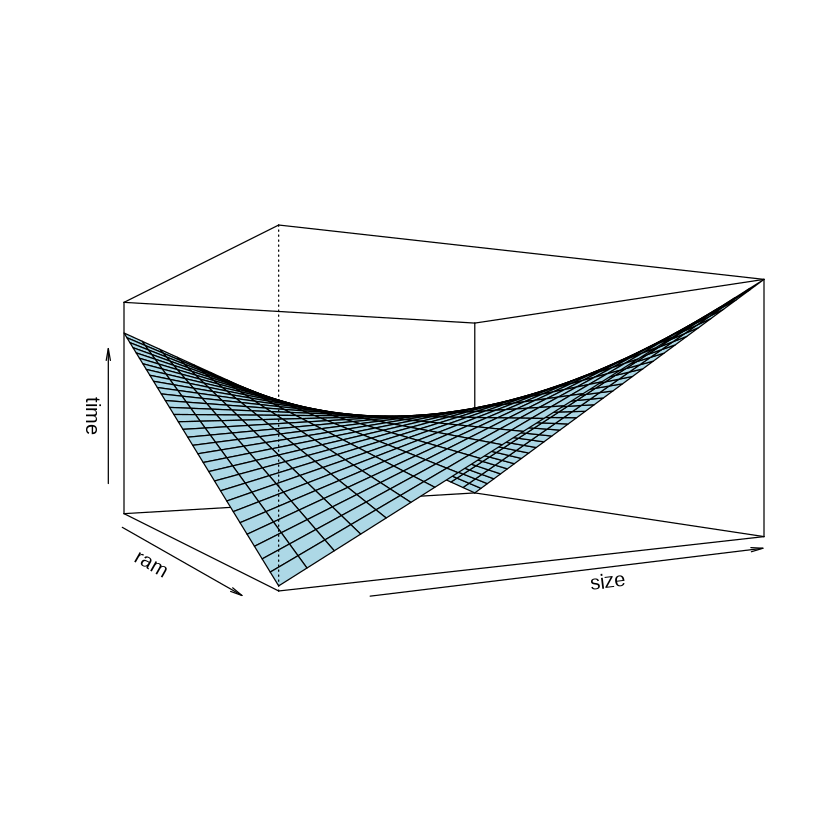

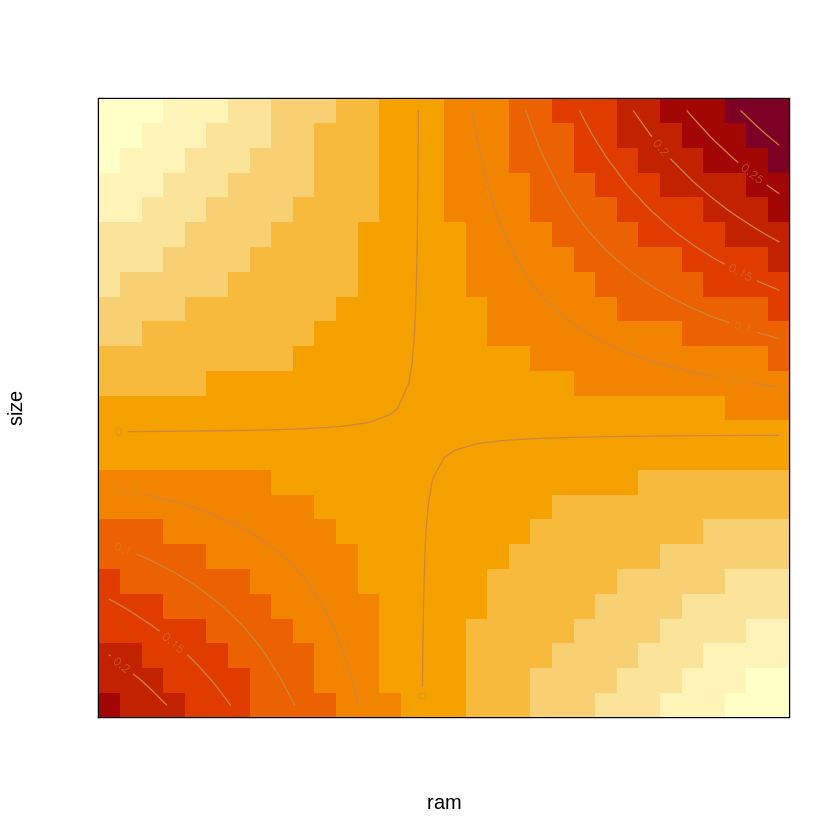

In [ ]:
x=seq(3.1,6.2,by=0.1)
y=seq(45,165,by=5)
impl = "1"
f = function(x,y){
    new.x=data.frame( x0=rep(impl,times=length(x)),x1=x,x2=y)
    colnames(new.x) <- c("implementation", "ram","size")

    predict(model_quantit_1, new.x)
}

# with implementation set to "1"
z = outer(x,y,f)
persp(x,y,z,theta=60,phi=0,expand=0.5,col="lightblue", xlab="ram",ylab="size",zlab="time")
image(x,y,z,axes=F,xlab="ram",ylab="size")

contour(x,y,z,levels=seq(0,3,by=0.05),add=T,col="peru")
axis(1,at=seq(-1,1,by=1),labels=c(3.1,4.6,6.2))
axis(2,at=seq(-1,1,by=1),labels=c(50,100,150))
box()

According to contour at implementation=1 (numpy implementation) the minimum is at (ram, size) = (3.1,165) and (ram, size) = (6.2,45)

In [ ]:
y1 = predict(model_quantit_1, data.frame(implementation="1", ram=3.1, size=165))
y2 = predict(model_quantit_1, data.frame(implementation="1", ram=6.2, size=45))
y = rbind(y1, y2)
y

,1
y1,-0.2876863
y2,-0.2790358


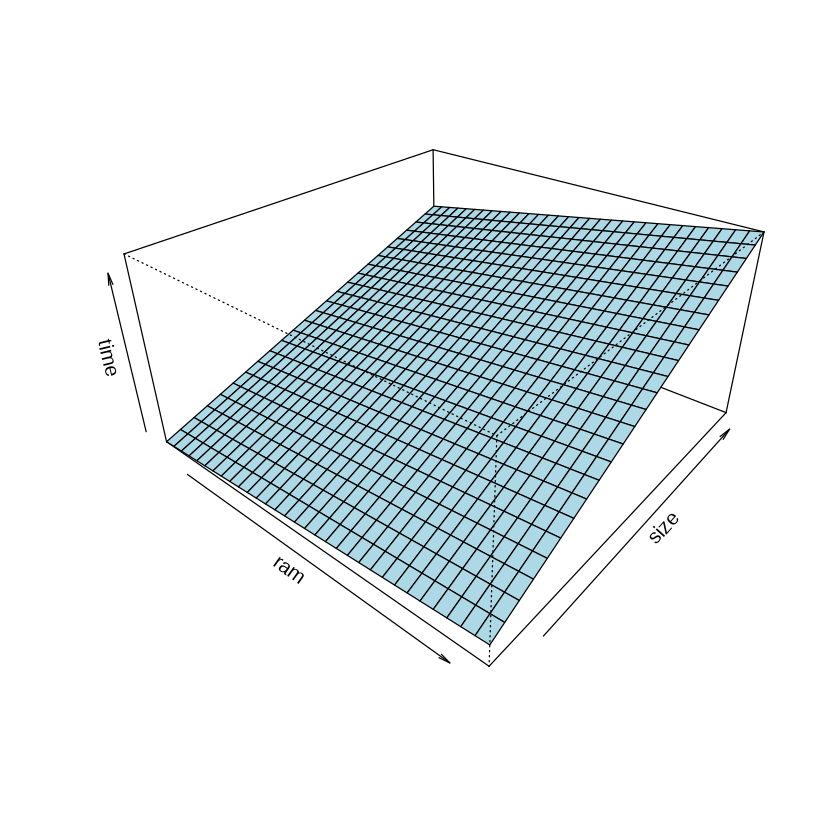

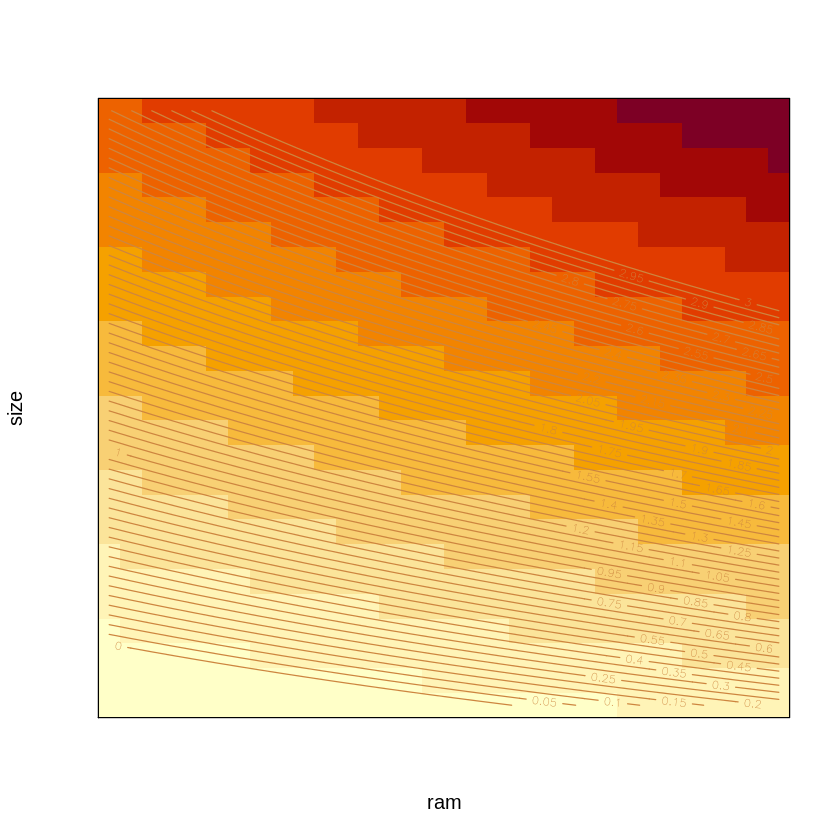

In [ ]:
x=seq(3.1,6.2,by=0.1)
y=seq(45,165,by=5)
impl = "-1"
f = function(x,y){
    new.x=data.frame( x0=rep(impl,times=length(x)),x1=x,x2=y)
    colnames(new.x) <- c("implementation", "ram","size")

    predict(model_quantit_1, new.x)
}

# with implementation set to "-1"
z = outer(x,y,f)
persp(x,y,z,theta=40,phi=30,expand=0.5,col="lightblue", xlab="ram",ylab="size",zlab="time")
image(x,y,z,axes=F,xlab="ram",ylab="size")

contour(x,y,z,levels=seq(0,3,by=0.05),add=T,col="peru")
axis(1,at=seq(-1,1,by=1),labels=c(3.1,4.6,6.2))
axis(2,at=seq(-1,1,by=1),labels=c(50,100,150))
box()

According to contour at implementation=-1 (own implementation) the minimum is at (ram, size) = (3.1,45). The minumum is:

In [ ]:
y = predict(model_quantit_1, data.frame(implementation="-1", ram=3.1, size=45))
y

1 
-0.314413

It is obvious, that by increasing intervals by 10 % we have violated the model assumption. Or that the model was wrong.